In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
stocks=pd.read_csv("STOCK_VAL.csv")

In [8]:
stocks.head()

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
0,09-02-2023,4626.90,4658.00,4585.00,4637.60,1722,607,7.958223e+06
1,08-02-2023,4597.05,4637.05,4578.00,4590.95,3670,906,1.690962e+07
2,07-02-2023,4630.00,4661.50,4595.95,4605.35,5979,1589,2.767515e+07
3,06-02-2023,4602.00,4634.10,4602.00,4626.60,4502,1230,2.079046e+07
4,03-02-2023,4590.00,4656.45,4571.50,4624.80,26221,4118,1.209830e+08


In [9]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   3985 non-null   object 
 1   OPEN                   3985 non-null   float64
 2   HIGH                   3985 non-null   float64
 3   LOW                    3985 non-null   float64
 4   CLOSE                  3985 non-null   float64
 5   NO. OF SHARES          3985 non-null   int64  
 6   NO. OF TRADES          3985 non-null   int64  
 7   Market Capitalization  3985 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 249.2+ KB


In [26]:
stocks.describe()

,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3.985000e+03
mean,1467.650688,1484.091581,1449.475498,1465.725084,17042.246424,1343.587453,2.908947e+07
std,1389.585296,1403.450025,1373.930620,1387.892115,37614.425349,1720.521070,6.185443e+07
min,108.200000,110.500000,99.130000,108.340000,1.000000,1.000000,2.221000e+02
25%,200.700000,204.400000,199.100000,200.770000,3251.000000,254.000000,9.275194e+05
50%,955.700000,963.000000,946.250000,953.730000,7737.000000,871.000000,9.219919e+06
75%,2943.000000,2980.000000,2890.250000,2921.900000,16899.000000,1786.000000,3.096887e+07
max,4630.000000,4661.500000,4602.000000,4637.600000,645876.000000,25588.000000,1.050377e+09


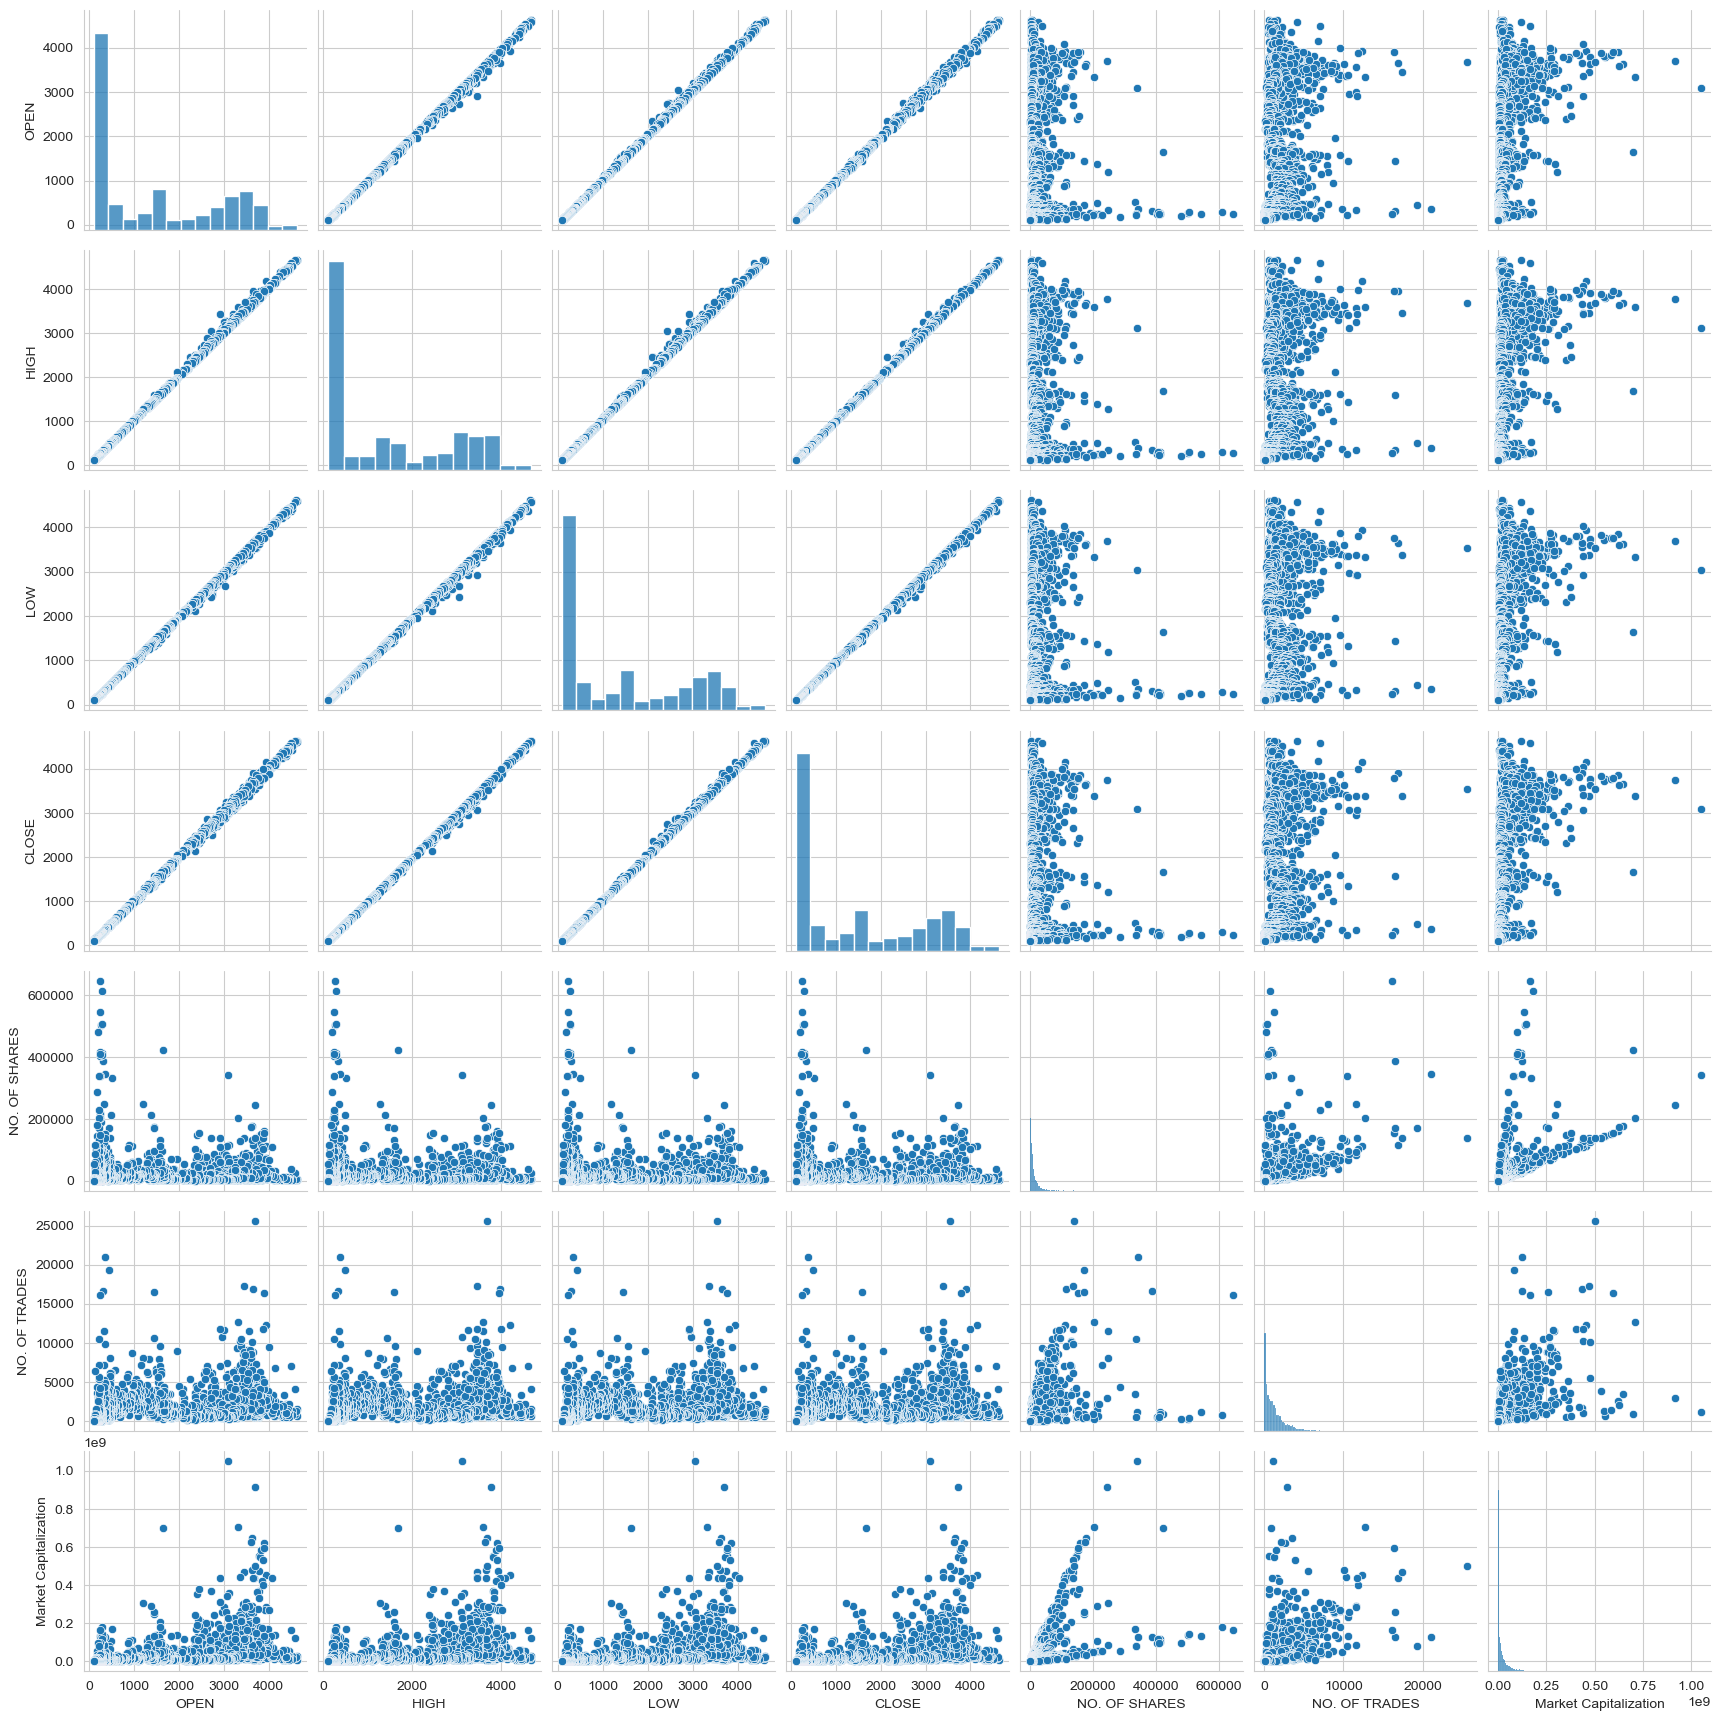

In [184]:
sns.pairplot(stocks)

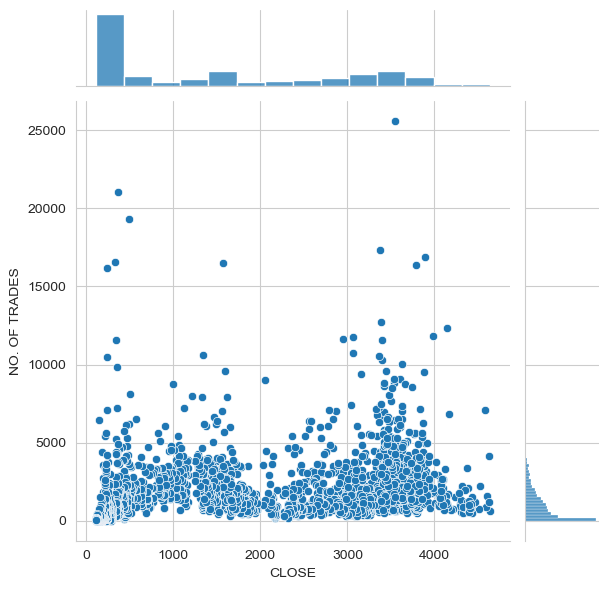

In [180]:
sns.jointplot(x='CLOSE',y='NO. OF TRADES',data=stocks,kind='scatter',color='')

In [14]:
sns.set_style('whitegrid')

<AxesSubplot:>

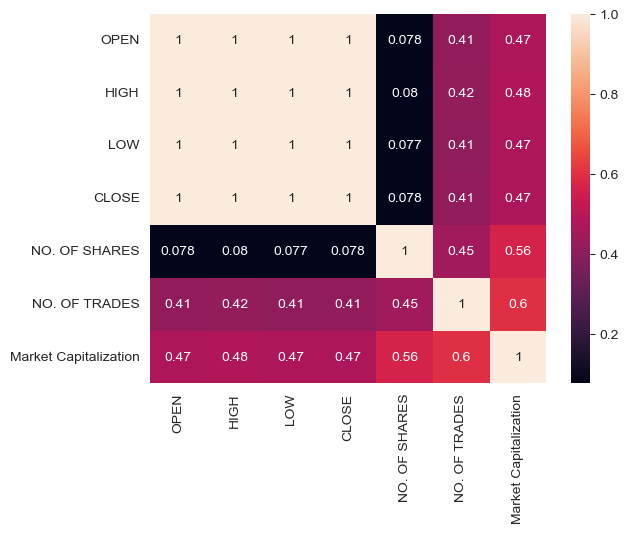

In [18]:
sns.heatmap(stocks.corr(),annot=True)

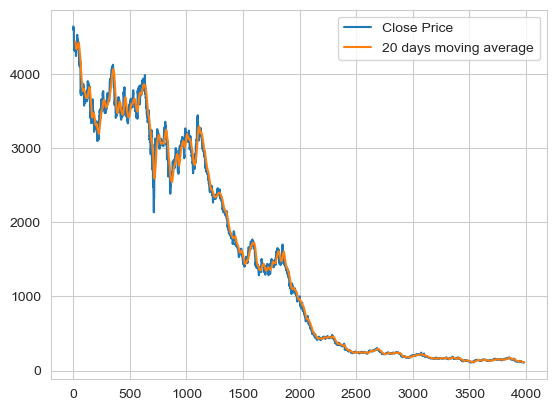

In [91]:
stocks['CLOSE'].plot()
stocks['CLOSE'].rolling(20).mean().plot()
plt.legend(['Close Price','20 days moving average'])

In [29]:
stocks.columns

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'NO. OF SHARES',
       'NO. OF TRADES', 'Market Capitalization'],
      dtype='object')

In [6]:
x_train=stocks[['OPEN', 'HIGH', 'LOW']]
y_train=stocks[['CLOSE']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
data=pd.read_csv("BRITANNIA.csv")
data_new = data.copy()                                 # Create copy of DataFrame
data_new = data_new.astype({'OPEN': float, 'HIGH': float,'LOW': float,'CLOSE': float})

In [13]:
x_test=data_new[['OPEN','HIGH','LOW']]
y_test=data_new[['CLOSE']]

In [14]:
predictions=lr.predict(x_test)

Text(0, 0.5, 'Predicted close price')

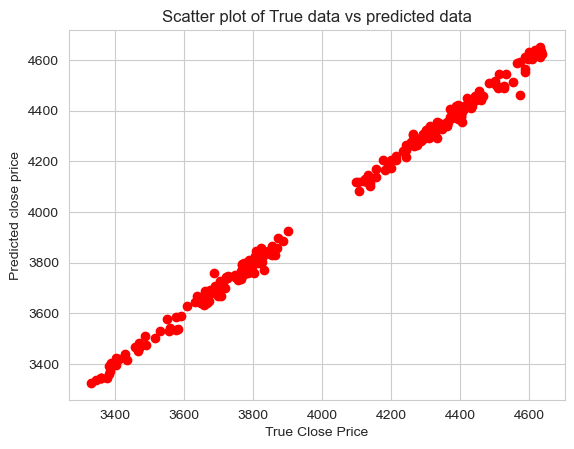

In [170]:
plt.scatter(y_test,predictions,c='red')
plt.title("Scatter plot of True data vs predicted data")
plt.xlabel("True Close Price")
plt.ylabel("Predicted close price")

In [15]:
list1=list(predictions)
list2=y_test['CLOSE']
dic={'True_val':list2,'Predictions':list1}

In [16]:
df=pd.DataFrame(dic)
df

,True_val,Predictions
0,3487.050049,[3510.3624490934835]
1,3470.449951,[3462.996168901917]
2,3516.500000,[3501.0824761932704]
3,3560.949951,[3543.155106140964]
4,3557.600098,[3530.9802901614]
...,...,...
242,4630.850098,[4651.412394851761]
243,4606.899902,[4603.2371078054175]
244,4631.899902,[4612.294692920424]
245,4564.350098,[4587.624642912749]


In [17]:
from sklearn import metrics

In [18]:
#error metrics
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,predictions))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,predictions))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R^2 value:",metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error: 16.39934775986488
Mean Squared Error: 434.46888571350786
Root Mean Squared Error: 20.843917235335297
R^2 value: 0.9969916339742485


Text(0.5, 0, 'True Value - Predicted Value')

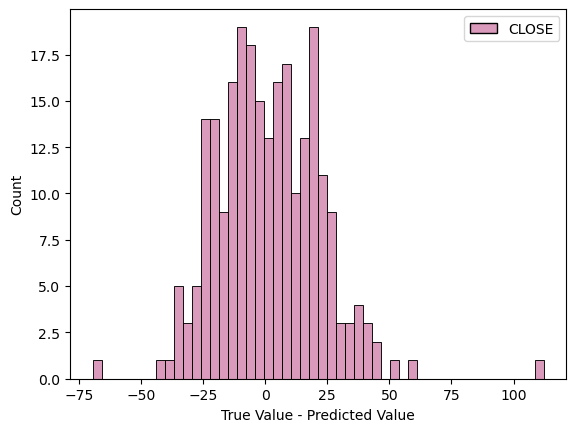

In [19]:
sns.histplot((y_test-predictions),bins=50,palette='magma')
plt.xlabel('True Value - Predicted Value')

In [129]:
#coefficient
cf=pd.DataFrame(lr.coef_.T,x_train.columns,columns=['Coefficient'])
cf

,Coefficient
OPEN,-0.404783
HIGH,0.657209
LOW,0.748195
